### Simple Moving Average Strat
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use("seaborn")

%matplotlib inline

In [2]:
def ticker_history(ticker):
    stock = yf.download(ticker)
    stock = stock.Close.to_frame()
    # Calcualte Log Returns
    stock["log_returns"] = np.log(stock.div(stock.shift(1)))
    # Drop NA
    stock.dropna(inplace=True)
    # Cumulative Log Returns
    stock["cum_ret"] = stock.log_returns.cumsum().apply(np.exp)
    # Cumulative Max Returns
    stock["cum_max"] = stock.cum_ret.cummax()
    # Drawdown
    stock["drawdown"] = stock["cum_max"] - stock["cum_ret"]
    # Calculate Pct Drawdown
    stock["drawdown_pct"] = (stock["cum_max"] - stock["cum_ret"])/(stock["cum_max"])
    return stock

In [3]:
aapl = ticker_history("AAPL")
aapl

[*********************100%***********************]  1 of 1 completed


,Close,log_returns,cum_ret,cum_max,drawdown,drawdown_pct
Date,,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569,0.073398
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831,0.050464
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738,0.022934
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000,0.000000
...,...,...,...,...,...,...
2022-04-25,162.880005,0.006715,1269.049879,1418.097708,149.047828,0.105104
2022-04-26,156.800003,-0.038043,1221.678653,1418.097708,196.419055,0.138509
2022-04-27,156.570007,-0.001468,1219.886683,1418.097708,198.211025,0.139772


In [4]:
data = aapl.Close.loc[(aapl.index>='1991-01-01')]
data = data.to_frame()
data

,Close
Date,
1991-01-02,0.388393
1991-01-03,0.383929
1991-01-04,0.386161
1991-01-07,0.386161
1991-01-08,0.386161
...,...
2022-04-25,162.880005
2022-04-26,156.800003
2022-04-27,156.570007


In [5]:
# Create 50 day MA and 100 day MA
sma_s = 50
sma_l = 100

In [6]:
data["sma_s"] = data.Close.rolling(sma_s).mean()
data["sma_l"] = data.Close.rolling(sma_l).mean()

In [7]:
data

,Close,sma_s,sma_l
Date,,,
1991-01-02,0.388393,NaN,NaN
1991-01-03,0.383929,NaN,NaN
1991-01-04,0.386161,NaN,NaN
1991-01-07,0.386161,NaN,NaN
1991-01-08,0.386161,NaN,NaN
...,...,...,...
2022-04-25,162.880005,166.800800,169.4606
2022-04-26,156.800003,166.564001,169.3809
2022-04-27,156.570007,166.317801,169.3090


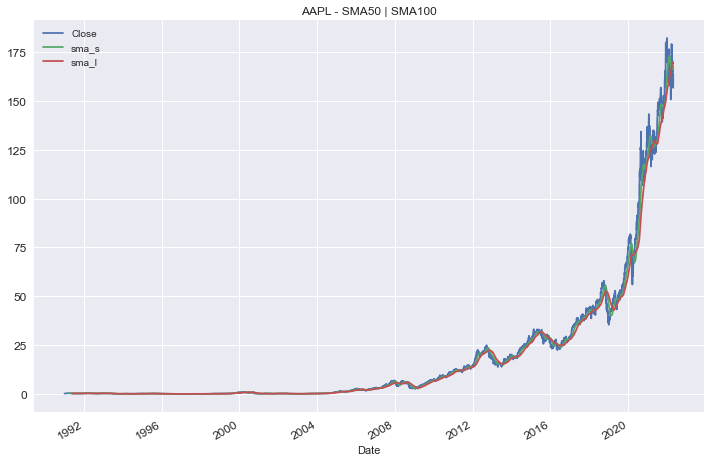

In [8]:
data.plot(figsize=(12,8), title='AAPL - SMA{} | SMA{}'.format(sma_s, sma_l), fontsize=12)
plt.show()

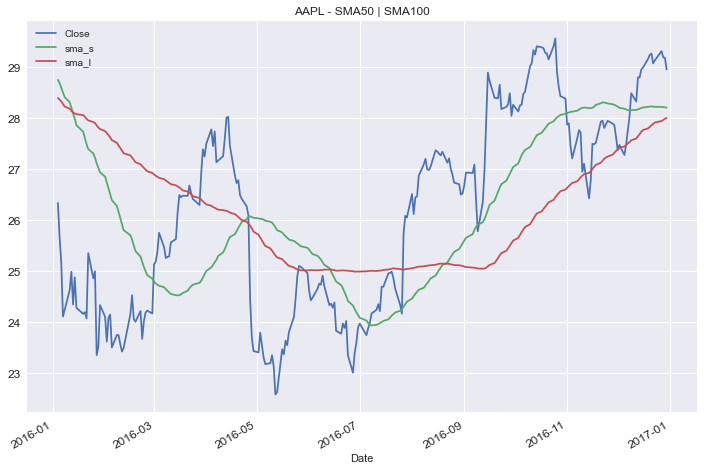

In [9]:
# Plot data for a specfic year
data.loc["2016"].plot(figsize=(12,8), title='AAPL - SMA{} | SMA{}'.format(sma_s, sma_l), fontsize=12)
plt.show()

In [10]:
# Drop Nas
data.dropna(inplace=True)
data

,Close,sma_s,sma_l
Date,,,
1991-05-23,0.402902,0.534420,0.513326
1991-05-24,0.409598,0.530960,0.513538
1991-05-28,0.410714,0.527344,0.513806
1991-05-29,0.419643,0.523638,0.514141
1991-05-30,0.425223,0.519732,0.514531
...,...,...,...
2022-04-25,162.880005,166.800800,169.460600
2022-04-26,156.800003,166.564001,169.380900
2022-04-27,156.570007,166.317801,169.309000


In [11]:
# Take a position when sma_s > sma_l
# Else take short when sma_s < sma_l
data["position"] = np.where(data["sma_s"]>data["sma_l"],1,-1)
data

,Close,sma_s,sma_l,position
Date,,,,
1991-05-23,0.402902,0.534420,0.513326,1
1991-05-24,0.409598,0.530960,0.513538,1
1991-05-28,0.410714,0.527344,0.513806,1
1991-05-29,0.419643,0.523638,0.514141,1
1991-05-30,0.425223,0.519732,0.514531,1
...,...,...,...,...
2022-04-25,162.880005,166.800800,169.460600,-1
2022-04-26,156.800003,166.564001,169.380900,-1
2022-04-27,156.570007,166.317801,169.309000,-1


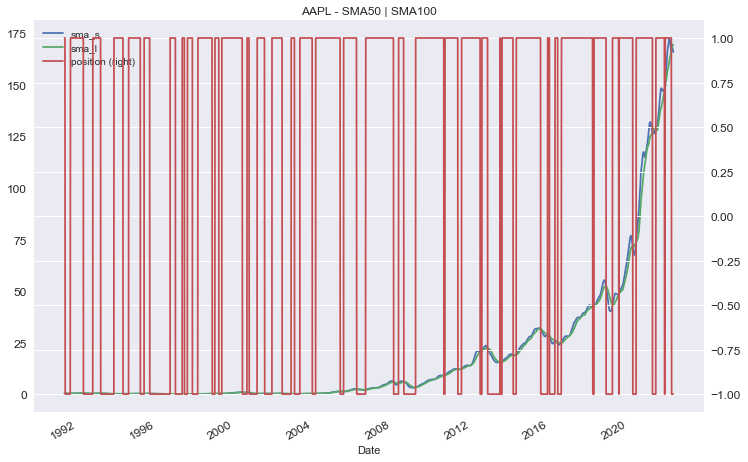

In [12]:
data.loc[:,["sma_s","sma_l","position"]].plot(figsize=(12,8), title='AAPL - SMA{} | SMA{}'.format(sma_s, sma_l), fontsize=12,secondary_y="position")
plt.show()

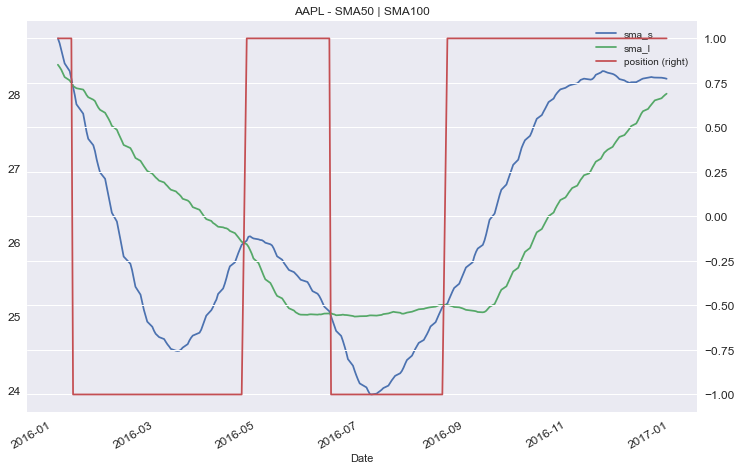

In [13]:
# 2016 only
data.loc["2016",["sma_s","sma_l","position"]].plot(figsize=(12,8), title='AAPL - SMA{} | SMA{}'.format(sma_s, sma_l), fontsize=12,secondary_y="position")
plt.show()

### Backtest Buy-and-Hold Returns
---

In [14]:
data["returns_buy_hold"] = np.log(data.Close.div(data.Close.shift(1)))
data

,Close,sma_s,sma_l,position,returns_buy_hold
Date,,,,,
1991-05-23,0.402902,0.534420,0.513326,1,NaN
1991-05-24,0.409598,0.530960,0.513538,1,0.016483
1991-05-28,0.410714,0.527344,0.513806,1,0.002721
1991-05-29,0.419643,0.523638,0.514141,1,0.021507
1991-05-30,0.425223,0.519732,0.514531,1,0.013209
...,...,...,...,...,...
2022-04-25,162.880005,166.800800,169.460600,-1,0.006715
2022-04-26,156.800003,166.564001,169.380900,-1,-0.038043
2022-04-27,156.570007,166.317801,169.309000,-1,-0.001468


In [15]:
# Returns x Position
# Buy and Hold returns are Long Only
# Strategy returns involce going short when sma_s < sma_l
data["strategy"] = data["returns_buy_hold"]*data.position.shift(1)
data

,Close,sma_s,sma_l,position,returns_buy_hold,strategy
Date,,,,,,
1991-05-23,0.402902,0.534420,0.513326,1,NaN,NaN
1991-05-24,0.409598,0.530960,0.513538,1,0.016483,0.016483
1991-05-28,0.410714,0.527344,0.513806,1,0.002721,0.002721
1991-05-29,0.419643,0.523638,0.514141,1,0.021507,0.021507
1991-05-30,0.425223,0.519732,0.514531,1,0.013209,0.013209
...,...,...,...,...,...,...
2022-04-25,162.880005,166.800800,169.460600,-1,0.006715,-0.006715
2022-04-26,156.800003,166.564001,169.380900,-1,-0.038043,0.038043
2022-04-27,156.570007,166.317801,169.309000,-1,-0.001468,0.001468


In [16]:
# Dropna
data.dropna(inplace=True)

In [17]:
# Returns for buy and hold are higher than for the strategy
data[['returns_buy_hold','strategy']].sum()

returns_buy_hold    5.969439
strategy            2.079627
dtype: float64

In [18]:
# What does a $1 investment retuns for buy and hold vs strategy?
data[["returns_buy_hold", "strategy"]].sum().apply(np.exp)

returns_buy_hold    391.286196
strategy              8.001487
dtype: float64

In [19]:
# Annualised standard deviation
data[["returns_buy_hold", "strategy"]].std()*np.sqrt(252)

returns_buy_hold    0.441509
strategy            0.441656
dtype: float64

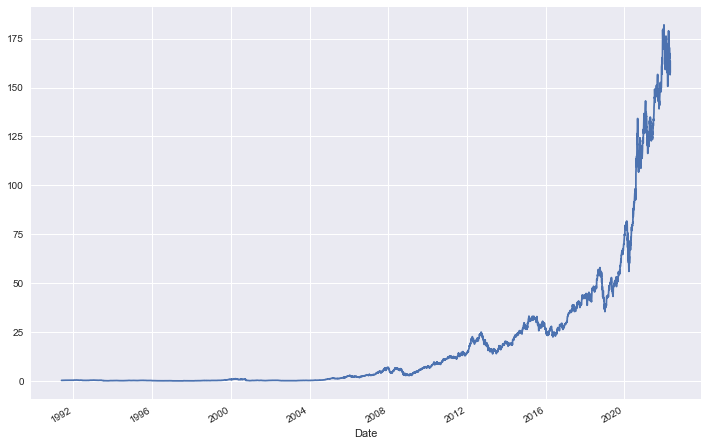

In [20]:
# General Bias to the upside which is why buy and hold outperforms
data.Close.plot(figsize=(12,8))
plt.show()

### Strategy Adjusted with Long-Bias
---

In [21]:
# Take a position when sma_s > sma_l
# Else don't buy when sma_s < sma_l
data["position2"] = np.where(data["sma_s"]>data["sma_l"],1,0)

In [22]:
# Strategy 2 Returns
data["strategy2"] = data["returns_buy_hold"]*data.position2.shift(1)
data.dropna(inplace=True)
data

,Close,sma_s,sma_l,position,returns_buy_hold,strategy,position2,strategy2
Date,,,,,,,,
1991-05-28,0.410714,0.527344,0.513806,1,0.002721,0.002721,1,0.002721
1991-05-29,0.419643,0.523638,0.514141,1,0.021507,0.021507,1,0.021507
1991-05-30,0.425223,0.519732,0.514531,1,0.013209,0.013209,1,0.013209
1991-05-31,0.419643,0.516027,0.514866,1,-0.013209,-0.013209,1,-0.013209
1991-06-03,0.439732,0.513259,0.515223,-1,0.046761,0.046761,0,0.046761
...,...,...,...,...,...,...,...,...
2022-04-25,162.880005,166.800800,169.460600,-1,0.006715,-0.006715,0,0.000000
2022-04-26,156.800003,166.564001,169.380900,-1,-0.038043,0.038043,0,-0.000000
2022-04-27,156.570007,166.317801,169.309000,-1,-0.001468,0.001468,0,-0.000000


In [23]:
data[["returns_buy_hold","strategy2"]].sum()

returns_buy_hold    5.952956
strategy2           4.008051
dtype: float64

In [24]:
data[["returns_buy_hold","strategy2"]].sum().apply(np.exp)

returns_buy_hold    384.889566
strategy2            55.039468
dtype: float64

In [25]:
# Reduce risk with a long bias strategy
data[["returns_buy_hold","strategy2"]].std()*np.sqrt(252)

returns_buy_hold    0.441528
strategy2           0.342800
dtype: float64

In [26]:
data[["strategy","strategy2"]].std()*np.sqrt(252)

strategy     0.441675
strategy2    0.342800
dtype: float64

## Strategy 2 (Long-Bias) is superior to Strategy 1 (Long-Short)

#### Creating our first function

In [41]:
def test_strategy(stock, start_date, end_date, SMA):
    df = yf.download(stock, start_date=start_date, end_date=end_date)
    # Get the close price and convert to dataframe
    data = df.Close.to_frame()
    data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)

    data["position"] = np.where(data["SMA_S"]>data["SMA_L"],1,-1)
    data["strategy"] = data["returns"]*data.position.shift(1)
    data.dropna(inplace=True)
    ret = np.exp(data["strategy"].sum())
    std = data["strategy"].std()*np.sqrt(252)
    return ret, std



In [42]:
test_strategy("MSFT","2000-01-01","2020-01-01",[50,200])

[*********************100%***********************]  1 of 1 completed


(41.009658462156395, 0.3388712004221365)

In [43]:
test_strategy("AAPL","2000-01-01","2020-01-01",[50,200])

[*********************100%***********************]  1 of 1 completed


(6.150632015532761, 0.4549240596190409)

In [44]:
test_strategy("TSLA","2000-01-01","2020-01-01",[50,200])

[*********************100%***********************]  1 of 1 completed


(11.693805569472616, 0.5554090293569561)

In [45]:
test_strategy("SPY","2000-01-01","2020-01-01",[50,200])

[*********************100%***********************]  1 of 1 completed


(8.753833703933292, 0.19008593529650777)

### Creating our first Class
---

In [54]:
class SMABacktester():
    
    def __init__(self, symbol, SMA_S, SMA_L, start_date, end_date):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start_date = start_date
        self.end_date = end_date
        self.results = None
        self.get_data()
    
    def get_data(self):
        df = yf.download(self.symbol, start_date=self.start_date, end_date=self.end_date)
        # Get the close price and convert to dataframe
        data = df.Close.to_frame()
        data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
        data["SMA_S"] = data.Close.rolling(self.SMA_S).mean()
        data["SMA_L"] = data.Close.rolling(self.SMA_L).mean()
        data.dropna(inplace=True)
        self.data2 = data
        
        return data
    
    def test_results(self):
        data = self.data2.copy().dropna()
        data["position"] = np.where(data["SMA_S"]>data["SMA_L"],1,-1)
        data["strategy"] = data["returns"]*data.position.shift(1)
        data.dropna(inplace=True)
        # Buy and Hold Returns
        data["returns_bh"] = data["returns"].cumsum().apply(np.exp)
        data["returns_strategy"] = data["strategy"].cumsum().apply(np.exp)
        # Last Row
        performance = data["returns_strategy"].iloc[-1]
        # Outperformance
        outperformance = performance - data["returns_bh"].iloc[-1]
        self.results = data

        ret = np.exp(data["strategy"].sum())
        std = data["strategy"].std()*np.sqrt(252)
        
        #return ret, std
        return round(performance, 6), round(outperformance, 6)
    
    def plot_results(self):
        if self.results is None:
            print("Run the test, please")
        else:
            title = "{}| SMA_S={} | SMA_L{}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["returns_bh", "returns_strategy"]].plot(title=title, figsize=(12,8))
        

In [55]:
tester = SMABacktester("SPY", 50, 100, "2000-01-01", "2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [56]:
tester.test_results()

(2.7359, -6.496593)

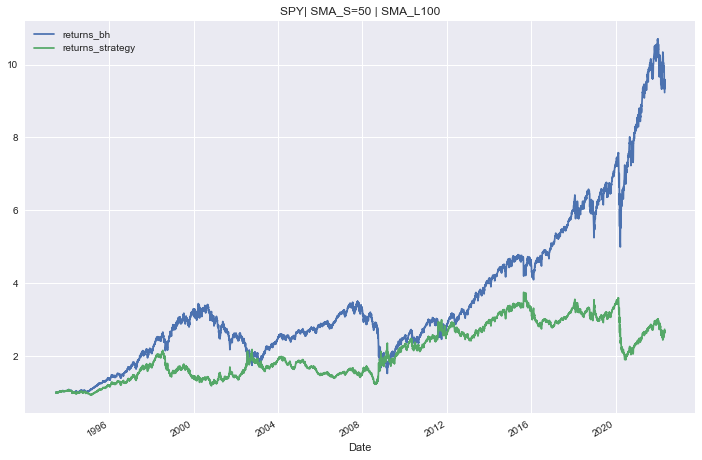

In [57]:
tester.plot_results()